# PhysioNet Data
Data source [link](https://physionet.org/content/snomed-ct-entity-challenge/1.0.0/)
* mimic-iv_notes_training_set: clinical notes raw texts
* train_annotations: annotation indices and SNOMED CT unique ids

In [2]:
import os
import pandas as pd

# umls query
import os
import requests
import pprint
import tqdm
from umls_client import UMLSClient, get_semantic_types
from dotenv import load_dotenv
load_dotenv()
api_key = os.getenv('UMLS_API_KEY')

In [2]:
FOLDER = '../data/benchmark_data'
notes_df = pd.read_csv(os.path.join(FOLDER, 'mimic-iv_notes_training_set.csv'))
annotation_df = pd.read_csv(os.path.join(FOLDER, 'train_annotations.csv'))

In [3]:
print(f'The total number of notes: {notes_df.shape[0]}')
print(f'The total number of annotations: {annotation_df.shape[0]}')
print(f"The number of UNIQUE annotation concepts: {annotation_df['concept_id'].nunique()}")

The total number of notes: 204
The total number of annotations: 51574
The number of UNIQUE annotation concepts: 5336


## Semantic Types

Use the UMLS APIs to retrieve the semantic types for each concept

In [3]:
from collections import Counter
import matplotlib.pyplot as plt
import json

In [5]:
client = UMLSClient(api_key=api_key)
ui_list = annotation_df['concept_id'].unique()
mapping = get_semantic_types(client, ui_list)

  1%|          | 32/5336 [00:07<20:38,  4.28it/s]

No results found for 51316009


 13%|█▎        | 719/5336 [02:55<17:30,  4.39it/s]

No results found for 108290001


 15%|█▍        | 794/5336 [03:13<15:25,  4.91it/s]

No results found for 47417003


 26%|██▌       | 1382/5336 [05:32<12:48,  5.15it/s]

No results found for 103716009


 26%|██▌       | 1391/5336 [05:34<14:03,  4.68it/s]

No results found for 116031009


 30%|███       | 1610/5336 [06:25<14:23,  4.31it/s]

No results found for 8966001


 39%|███▉      | 2093/5336 [08:19<10:33,  5.12it/s]

No results found for 182813001


 41%|████      | 2165/5336 [08:36<10:13,  5.17it/s]

No results found for 427867005


 43%|████▎     | 2299/5336 [09:06<11:50,  4.28it/s]

No results found for 271084006


 48%|████▊     | 2549/5336 [10:07<11:36,  4.00it/s]

No results found for 781382000


 48%|████▊     | 2565/5336 [10:10<09:27,  4.88it/s]

No results found for 315642008


 50%|█████     | 2679/5336 [10:37<08:53,  4.98it/s]

No results found for 78441005


 51%|█████     | 2724/5336 [10:48<09:39,  4.51it/s]

No results found for 1255671001


 62%|██████▏   | 3291/5336 [13:06<06:41,  5.10it/s]

No results found for 18944008


 70%|██████▉   | 3719/5336 [14:45<05:04,  5.31it/s]

No results found for 765030005


 71%|███████▏  | 3809/5336 [15:07<05:19,  4.79it/s]

No results found for 1279755003


 80%|████████  | 4280/5336 [17:06<03:33,  4.94it/s]

No results found for 281399006


 83%|████████▎ | 4406/5336 [17:36<02:57,  5.25it/s]

No results found for 361128007


 89%|████████▉ | 4743/5336 [18:55<02:13,  4.44it/s]

No results found for 84499006


 91%|█████████ | 4862/5336 [19:35<03:01,  2.61it/s]

No results found for 267022002


 97%|█████████▋| 5150/5336 [21:43<01:11,  2.62it/s]

No results found for 443432005


100%|██████████| 5336/5336 [23:08<00:00,  3.84it/s]


In [ ]:
# Convert all keys to strings
semantic_map_str_keys = {str(k): v for k, v in mapping.items()}

# Write to JSON
with open('semantic_map.json', 'w') as f:
    json.dump(semantic_map_str_keys, f, indent=2)


In [4]:
with open('semantic_map.json') as f:
    mapping = json.load(f)

In [5]:
# Flatten values into a list
all_types = [stype for types in mapping.values() for stype in types]
type_counts = Counter(all_types)

# Print the counts
for semantic_type, count in type_counts.items():
    print(f"{semantic_type}: {count}")

Disease or Syndrome: 903
Therapeutic or Preventive Procedure: 641
Congenital Abnormality: 21
Finding: 1124
Acquired Abnormality: 28
Body System: 11
Health Care Activity: 155
Body Part, Organ, or Organ Component: 596
Mental or Behavioral Dysfunction: 101
Sign or Symptom: 319
Neoplastic Process: 141
Diagnostic Procedure: 236
Pathologic Function: 233
Daily or Recreational Activity: 1
Educational Activity: 11
Body Substance: 9
Organism Attribute: 8
Laboratory or Test Result: 52
Laboratory Procedure: 188
Qualitative Concept: 12
Organ or Tissue Function: 12
Body Space or Junction: 52
Body Location or Region: 160
Clinical Drug: 2
Anatomical Abnormality: 50
Quantitative Concept: 1
Temporal Concept: 5
Mental Process: 6
Functional Concept: 18
Injury or Poisoning: 116
Food: 1
Spatial Concept: 15
Tissue: 30
Individual Behavior: 10
Cell: 6
Organism Function: 7
Embryonic Structure: 5
Clinical Attribute: 1
Genetic Function: 1
Medical Device: 1
Human-caused Phenomenon or Process: 1
Social Behavior: 4


In [15]:
type_counts.most_common(10)

[('Finding', 1124),
 ('Disease or Syndrome', 903),
 ('Therapeutic or Preventive Procedure', 641),
 ('Body Part, Organ, or Organ Component', 596),
 ('Sign or Symptom', 319),
 ('Diagnostic Procedure', 236),
 ('Pathologic Function', 233),
 ('Laboratory Procedure', 188),
 ('Body Location or Region', 160),
 ('Health Care Activity', 155)]

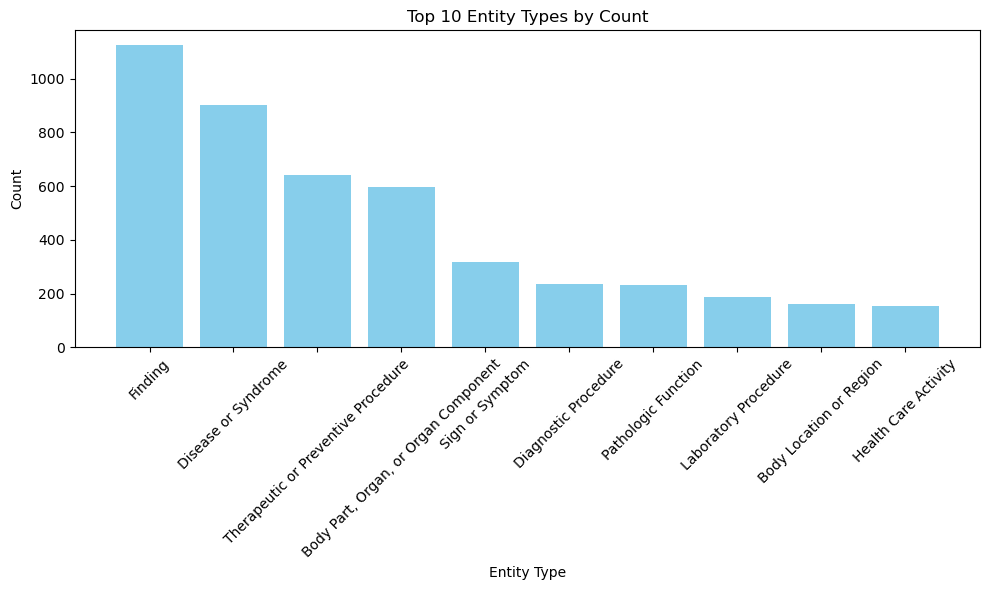

In [18]:
# Get top 10
top_10 = type_counts.most_common(10)
top_10_df = pd.DataFrame(top_10, columns=["Entity", "Count"])

# Plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_df["Entity"], top_10_df["Count"], color='skyblue')
plt.title("Top 10 Entity Types by Count")
plt.xlabel("Entity Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()

# Save as image (optional)
plt.savefig("top_10_entity_types.png", dpi=300)
plt.show()


## Semantic Groups

Full Descriptions of Semantic Network vs Semantic Groups: [link](https://www.nlm.nih.gov/research/umls/knowledge_sources/semantic_network/index.html) <br>

The UMLS Semantic Network reduces the complexity of the Metathesaurus by grouping concepts according to the Semantic Types that have been assigned to them. For certain purposes, however, an even smaller and coarser-grained set of semantic type groupings may be desirable. The following principles were used to design the groupings: semantic validity, parsimony, completeness, exclusivity, naturalness, and utility. The Semantic Groups provide a partition of the UMLS Metathesaurus for 99.5% of the concepts.

In [4]:
semgroups_df = pd.read_csv('SemGroups.txt', delimiter='|', names=["group_abbr", "group_name", "tui", "semantic_type"])
semgroups_df.head()

,group_abbr,group_name,tui,semantic_type
0,ACTI,Activities & Behaviors,T052,Activity
1,ACTI,Activities & Behaviors,T053,Behavior
2,ACTI,Activities & Behaviors,T056,Daily or Recreational Activity
3,ACTI,Activities & Behaviors,T051,Event
4,ACTI,Activities & Behaviors,T064,Governmental or Regulatory Activity


In [5]:
semgroups_df_reordered = semgroups_df[['semantic_type', 'tui', 'group_name', 'group_abbr']]
semgroups_df_reordered.to_csv('semantic_groups.csv', index=None)